In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns


$\textbf{Part A : Generating x}$

In [2]:
# independent variable x 

x = random.uniform(-20,20,100)
x

array([  3.11927029,  10.78170511,  -5.09613856, -18.52804856,
        10.68843544,   8.59664805,  11.31839543,  -7.48365113,
       -17.36992722,  13.55722395,  -3.55247863,  10.74146197,
        16.19898927,   8.30169977,  16.89398796, -11.85468657,
        -2.39820374,  -2.55621848,  19.71714507,   9.04944647,
         4.80614272,  -8.54361837,   7.08997036,  19.45223361,
        12.66510263,  -1.75654009, -16.75980303,  12.77624809,
        -1.1121139 , -12.60443351, -17.02937514, -10.5000176 ,
         4.57098511, -17.10144804,   4.67049197,  18.95525356,
         5.85346431,  -3.15204985, -18.5842561 ,  15.01525044,
         7.77678622, -19.18865392, -13.17143315,  14.40509644,
         6.14260646,   9.49140694,  17.43195408,  -0.77443437,
        -0.16895283,  -7.88718725,  15.03054067,   6.58674052,
        18.50929758,   3.01597804,  14.39628799, -15.6801503 ,
       -17.20204594,  11.04443936,   7.76537569,   5.82690897,
        15.208476  , -13.05400094,   7.1979716 ,  12.83

$\textbf{Part B : Generating $f(x) = t$ as a third degree polynomial dependent on x and plus some noise with initian mean and variance both equal to 0.}$

$t = f(x) = ax^3 + bx^2+ cx +d + e$

$where, \ e \sim \mathcal{N}(0, \sigma^2)$

Initially in this example $\sigma  = 0$




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


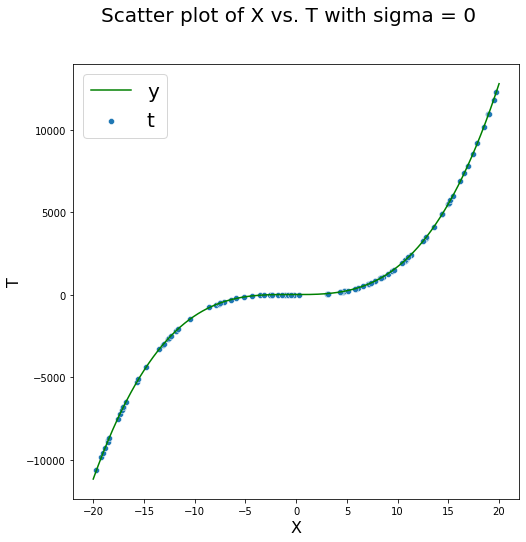

In [3]:
a = 1.5
b= 2
c= -1
d = 5
sigma = 0

e = random.normal(0,sigma,len(x))

t = a*(x**3) + b*(x**2) + c*x + d + e




x_ax = np.linspace(-20,20,1000)
y = a*(x_ax**3) + b*(x_ax**2) + c*x_ax + d

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x,t, label = 't')
plt.plot(x_ax,y, 'green', label='y')
fig.suptitle('Scatter plot of X vs. T with sigma = {}'.format(sigma), fontsize = 20)
ax.set_xlabel('X', fontsize= 16)
ax.set_ylabel('T', fontsize= 16)
plt.legend(fontsize= 20)
plt.show()

$\textbf{Part C : Generating x as vector powers. }$

$X = \begin{bmatrix} x_1^0 & x_1 & x_1^2 & x_1^3 \\ x_2^0 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots & \\ x_n^0 & x_n & x_n^2 & x_n^3  \end{bmatrix} =  \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots & \\ 1 & x_n & x_n^2 & x_n^3  \end{bmatrix}$

In [4]:
X_mat = np.array([x**0 , x**1 , x**2, x**3 ]).T

X_mat.shape



(100, 4)

$\textbf{Part D : Estimating the fitted model y_model }$

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


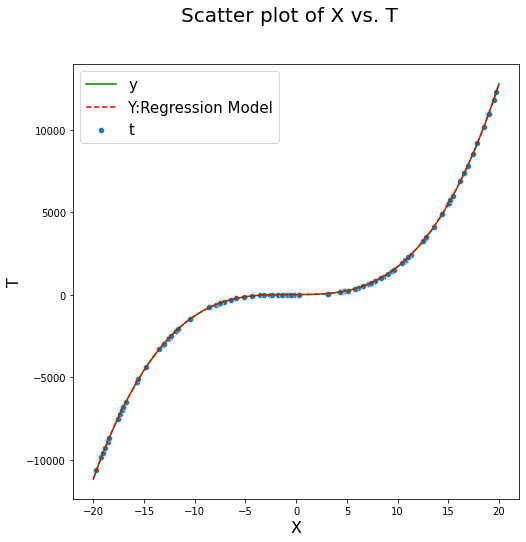

In [5]:
#Calculating the psuedo inverse of design matrix
X_mat_inv = np.linalg.pinv(X_mat)

#Calculating the weights for the model
w = np.matmul(X_mat_inv, t.reshape((len(x),1)))


#Creating a matrix to test the model on data X_model

X_model = np.array([x_ax**0 , x_ax**1 , x_ax**2, x_ax**3]).T
y_model = np.matmul(X_model, w)

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x,t, label = 't')
plt.plot(x_ax,y, 'green', label='y')
plt.plot(x_ax,y_model, 'red', label='Y:Regression Model', linestyle='dashed')
fig.suptitle('Scatter plot of X vs. T', fontsize = 20)
ax.set_xlabel('X', fontsize= 16)
ax.set_ylabel('T', fontsize= 16)
plt.legend(fontsize= 15)
plt.show()


$\textbf{Part E : Estimating the fitted model y_model }$

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


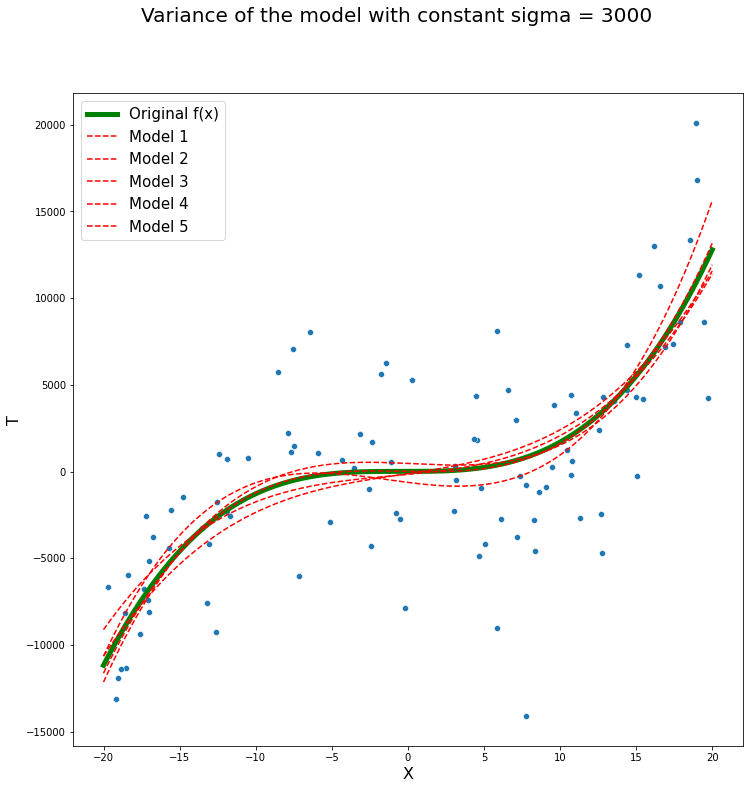

In [30]:
#Creating an array of x to check for variance of x for different values of sigma


sigma = 3000
e = random.normal(0,sigma,len(x))

x_ax = np.linspace(-20,20,1000)
y = a*(x_ax**3) + b*(x_ax**2) + c*x_ax + d



fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x,t)
plt.plot(x_ax,y, 'green', label='Original f(x)', linewidth=5)


for i in range(5):
  x_boot = random.choice(x,len(x),replace=True)
  t_boot = a*(x_boot**3) + b*(x_boot**2) + c*x_boot + d + e

  #Creating an matrix x to calculate the weights (design matrix)
  X_mat = np.array([x_boot**0 , x_boot**1 , x_boot**2, x_boot**3 ]).T
  X_mat.shape


  #Calculating the psuedo inverse of design matrix
  X_mat_inv = np.linalg.pinv(X_mat)

  #Calculating the weights for the model
  w = np.matmul(X_mat_inv, t_boot.reshape((len(x_boot),1)))


  #Creating a matrix to test the model on data X_model

  X_model = np.array([x_ax**0 , x_ax**1 , x_ax**2, x_ax**3]).T
  y_model = np.matmul(X_model, w)
  plt.plot(x_ax,y_model, 'red', label='Model {}'.format(i+1), linestyle='dashed')
  


fig.suptitle('Variance of the model with constant sigma = {}'.format(sigma), fontsize = 20)
ax.set_xlabel('X', fontsize= 16)
ax.set_ylabel('T', fontsize= 16)
plt.legend(fontsize= 15)
plt.show()


$\textbf{Part F : Using only linear model to fit the underlying polunomial curve and checking the variane }$

$X = \begin{bmatrix} x_1^0 & x_1  \\ x_2^0 & x_2  \\ \vdots & \vdots  \\ x_n^0 & x_n   \end{bmatrix} =  \begin{bmatrix} 1 & x_1  \\ 1 & x_2  \\ \vdots & \vdots   \\ 1 & x_n   \end{bmatrix}$

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


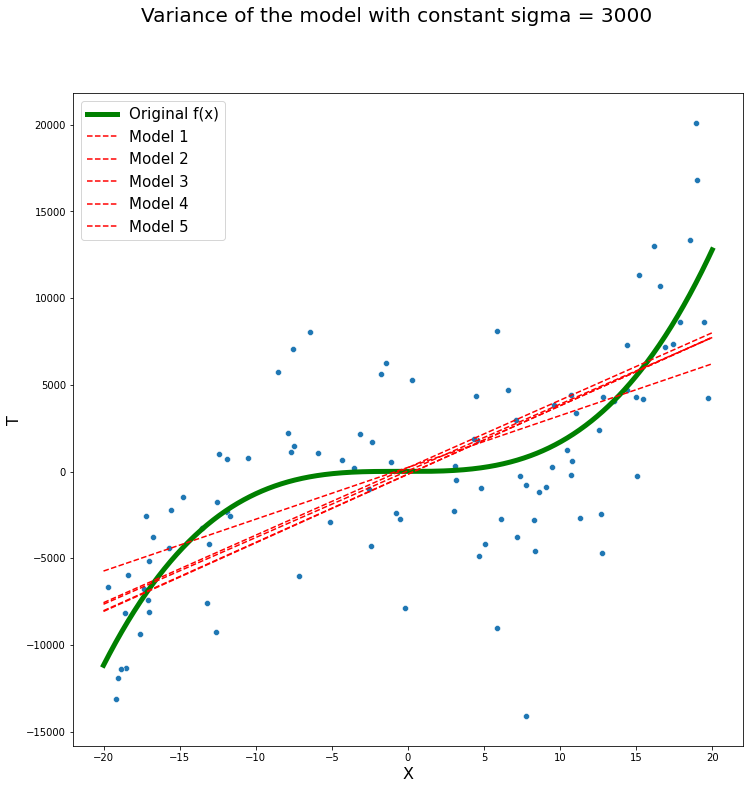

In [31]:
#Creating an array of x to check for variance of x for different values of sigma


sigma = 3000
e = random.normal(0,sigma,len(x))

x_ax = np.linspace(-20,20,1000)
y = a*(x_ax**3) + b*(x_ax**2) + c*x_ax + d



fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x,t)
plt.plot(x_ax,y, 'green', label='Original f(x)', linewidth=5)


for i in range(5):
  x_boot = random.choice(x,len(x),replace=True)
  t_boot = a*(x_boot**3) + b*(x_boot**2) + c*x_boot + d + e

  #Creating an matrix x to calculate the weights (design matrix)
  X_mat = np.array([x_boot**0 , x_boot**1 ]).T
  X_mat.shape


  #Calculating the psuedo inverse of design matrix
  X_mat_inv = np.linalg.pinv(X_mat)

  #Calculating the weights for the model
  w = np.matmul(X_mat_inv, t_boot.reshape((len(x_boot),1)))


  #Creating a matrix to test the model on data X_model

  X_model = np.array([x_ax**0 , x_ax**1]).T
  y_model = np.matmul(X_model, w)
  plt.plot(x_ax,y_model, 'red', label='Model {}'.format(i+1), linestyle='dashed')
  


fig.suptitle('Variance of the model with constant sigma = {}'.format(sigma), fontsize = 20)
ax.set_xlabel('X', fontsize= 16)
ax.set_ylabel('T', fontsize= 16)
plt.legend(fontsize= 15)
plt.show()


***Remarks :*** *As we can see from the above two graphs in section e and f, its very clear that when we use a polynomila function of degree 3 to predict the original data which actually have 3 degree, out model is very close to the real data line. That is the bias in the model is very less. But when we compare it to the data in the section f, then wee observe that in this model we are trying to fit or trying to estimate the curve using just a line. The variance of this model is very less compared to the previous one but at a cost of increasing hig bias.* ***The model in section e has lower MSE (bias)***